# Geração Automatizada de Gráficos de Nascimentos – SINASC RO 2019

Este notebook gera gráficos de nascimentos com base em arquivos do banco de dados SINASC (Sistema de Informações sobre Nascidos Vivos) para o estado de Rondônia no ano de 2019.

A proposta é automatizar a análise mensal com base em arquivos já existentes, recebendo abreviações dos meses como entrada e produzindo pastas com os gráficos correspondentes.


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Dicionário para mapear abreviações dos meses para números com dois dígitos
mapa_meses = {
    "JAN": "01", "FEV": "02", "MAR": "03", "ABR": "04",
    "MAI": "05", "JUN": "06", "JUL": "07", "AGO": "08",
    "SET": "09", "OUT": "10", "NOV": "11", "DEZ": "12"
}

# Lista de meses de interesse (edite conforme necessidade)
meses_desejados = ["MAR", "ABR", "MAI", "JUN", "JUL"]


In [5]:
def gerar_analise_por_mes(mes_abrev):
    mes_num = mapa_meses.get(mes_abrev.upper())
    if not mes_num:
        print(f"Mês inválido: {mes_abrev}")
        return

    nome_pasta = f"2019-{mes_num}"
    os.makedirs(nome_pasta, exist_ok=True)

    nome_arquivo = f"SINASC_RO_2019_{mes_abrev.upper()}.csv"
    if not os.path.exists(nome_arquivo):
        print(f"Arquivo {nome_arquivo} não encontrado.")
        return

    # Leitura dos dados
    df = pd.read_csv(nome_arquivo)

    # Gráfico de distribuição por sexo com correção de aviso
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="SEXO", hue="SEXO", palette="pastel", legend=False)
    plt.title(f"Nascimentos por Sexo - {mes_abrev.upper()}/2019")
    plt.xlabel("Sexo")
    plt.ylabel("Quantidade")

    caminho_grafico = os.path.join(nome_pasta, f"sexo_{mes_num}.png")
    plt.savefig(caminho_grafico)
    plt.close()

    print(f"Análise para {mes_abrev.upper()} concluída. Pasta: {nome_pasta}")


In [6]:
for mes in meses_desejados:
    gerar_analise_por_mes(mes)


Análise para MAR concluída. Pasta: 2019-03
Análise para ABR concluída. Pasta: 2019-04
Análise para MAI concluída. Pasta: 2019-05
Análise para JUN concluída. Pasta: 2019-06
Análise para JUL concluída. Pasta: 2019-07


## Como Automatizar Mais no Futuro

Para melhorar ainda mais a automação da geração de gráficos em meses/anos seguintes, é possível:

- Ler os nomes dos arquivos automaticamente com glob ou os.listdir().
- Extrair o mês e o ano diretamente do nome dos arquivos.
- Permitir filtros mais complexos (ex: faixa etária, local de nascimento, escolaridade da mãe).
- Usar funções reutilizáveis para diferentes tipos de gráficos (por sexo, idade da mãe, etc).
- Exportar os resultados para relatórios em PDF ou dashboards interativos com Streamlit ou Dash.
- Automatizar todo o processo com agendamentos (ex: cron, Airflow).


---
## Exibidor

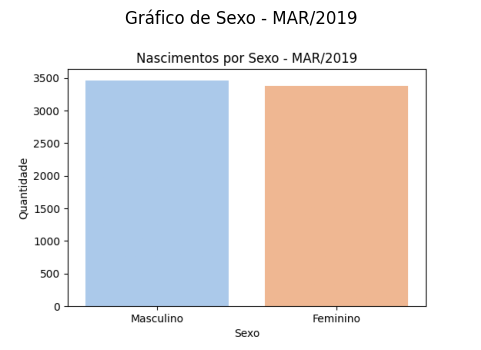

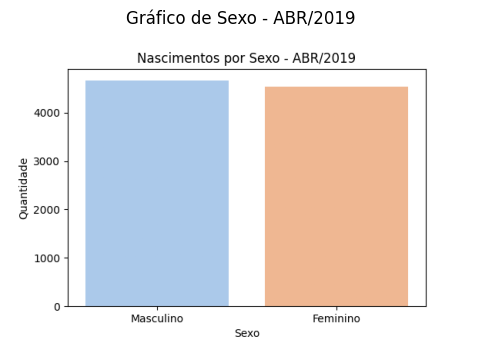

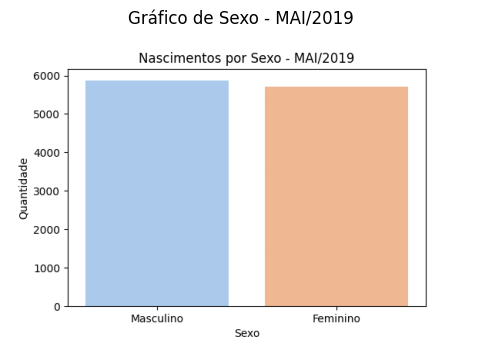

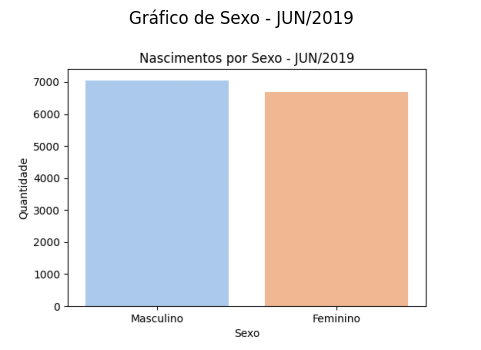

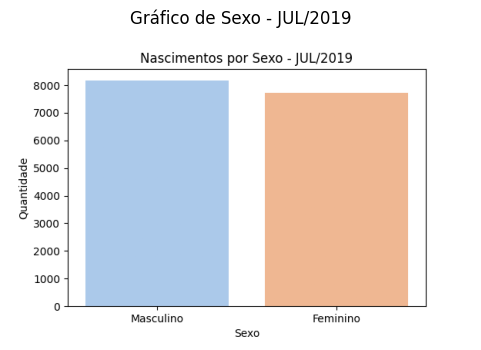

In [7]:
import matplotlib.image as mpimg

def exibir_graficos(meses_abreviados):
    for mes_abrev in meses_abreviados:
        mes_num = mapa_meses.get(mes_abrev.upper())
        if not mes_num:
            print(f"Mês inválido: {mes_abrev}")
            continue

        nome_pasta = f"2019-{mes_num}"
        nome_imagem = os.path.join(nome_pasta, f"sexo_{mes_num}.png")

        if os.path.exists(nome_imagem):
            img = mpimg.imread(nome_imagem)
            plt.figure(figsize=(6, 4))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Gráfico de Sexo - {mes_abrev.upper()}/2019")
            plt.show()
        else:
            print(f"Imagem {nome_imagem} não encontrada.")

# Exemplo de chamada:
meses = ["MAR", "ABR", "MAI", "JUN", "JUL"]
exibir_graficos(meses)
